# Imports 

In [1]:
from collections import defaultdict
import itertools
import sys
import random
import networkx as nx
import matplotlib.pyplot as plt

# Intoduction to the Class Graph

In [10]:
class Graph(object):
    '''
    Graph Data Structure, undirected 
    '''
    
    def __init__(self):
        self.adjacency = defaultdict(set)
        self.coordinates = {}
        self.adj_list_d = defaultdict(list)
        self.adj_list_t = defaultdict(list)
        self.adj_list_n = defaultdict(list)
        
    def add(self, node1, node2):
        ''' Add connection between node1, node2'''
        self.adjacency[int(node1)].add(int(node2))
        self.adjacency[int(node2)].add(int(node1))
        #self.net[int(node1), int(node2)] = 1
    
    def distance(self, node1, node2, d):
        ''' Create the distance measure between node1 and node2 '''
        #self.dis[(int(node1), int(node2))] = int(d)
        if [int(d), int(node2)] not in self.adj_list_d[int(node1)]:
            self.adj_list_d[int(node1)].append([int(d), int(node2)])
            self.adj_list_d[int(node2)].append([int(d), int(node1)])
            self.adj_list_n[int(node1)].append([1, int(node2)])
            self.adj_list_n[int(node2)].append([1, int(node1)])
        
    def time(self, node1, node2, t):
        ''' Create the time distance measure between node 1 and node 2'''
        
        #self.tim[(int(node1), int(node2))] = int(t)
        if [ int(t), int(node2)] not in  self.adj_list_t[int(node1)]:
            self.adj_list_t[int(node1)].append([ int(t), int(node2)])
            self.adj_list_t[int(node2)].append([int(t), int(node1)])
        
    def coordinate(self, node, coordinate1, coordinate2):
        '''Save the coordinates of every node'''
        self.coordinates[int(node)] = [int(coordinate1), int(coordinate2)]
    
    def nodes_(self):
        ''' All the nodes of the graph '''
        return list(set(self.adjacency.keys()))
    
    def edges(self):
        ''' Return all the edges of the graph '''
        return list(self.dis.keys())
    
    def print_adj_list_d(self):
        for keys, values in self.adj_list_d.items():
            print(keys, values)
            
    def print_adj_list_t(self):
        for keys, values in self.adj_list_d.items():
            print( keys, values)
            
            
    ''' We will use the dfs to make a list of nodes where  
             we can start my MST algorithm in functionality2
             because running all the tree we can find the connected component with one node
     '''   
    def dfs(self, startnode, visited, kind): #kind is a function that will be used to recall self.adj_list_d,t or n in base of the user request
        if visited is None:
            visited = set() 
        visited.add(startnode)
        for i in kind[startnode]:
            if i[1] not in visited:
                    self.dfs(i[1], visited, kind)
        return visited
    
    
    '''We use BFS because it returns the minimal graph from a starting point, and because
    we care about <=distance we modified the algo to work with the weights'''
    def bfs(self, startnode, dist, kind):
        visited = []
        queue = [startnode]
        distqueue = [0]
        while queue:
            node = queue.pop(0)
            dqueue = distqueue.pop(0)
            if dqueue <= dist and node not in visited:
                visited.append(node)
                if dqueue <= dist:
                    for neigh in kind[node]:
                        queue.append(neigh[1])
                        distqueue.append(neigh[0]+dqueue)
        return visited
    
    
    '''the functionality uses functional programming to call the kind of dictionaries associated with the distances
    this will happend for every functionality'''           
    def functionality1(self):
        startnode = int(input("Give me the node as a number  \n "))
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
        dist = int(input("Put a number as threshold distance: \n "))
        if measure == 1:
            return (self.bfs(startnode, dist, self.adj_list_d), measure)
        elif measure == 2:
            return (self.bfs(startnode, dist, self.adj_list_t), measure)
        elif measure == 3 :
            return (self.bfs(startnode, dist, self.adj_list_n),measure)
        
        
    '''Algo inspired by Prim algoritms for mst  '''  
    def mst(self, nodes, kind):
        n = len(nodes)
        originals = nodes
        tree = []
        nodesfixed = []
        minweight = sys.float_info.max
        tempath = []
        for i in range(n):
                for j in range(i+1, n):
                    A, B = self.dijsktra(nodes[i], nodes[j], kind)
                    if B != []:
                        #print(B)
                        if B < minweight:
                            minweight = B
                            temporary = [nodes[i],nodes[j]]
                            tempath = A
        if minweight == sys.float_info.max:
            return('NO PATH POSSIBLE; TOTALLY DISCONNECTED NODES')
        for h in tempath:
            tree.append(h)
        for x in temporary:
            nodesfixed.append(x)
        nn = []
        for no in nodes:
            if no not in temporary:
                nn.append(no)
        nodes = nn
        if n>2:
            while(nodes != []):
                minweight = sys.float_info.max
                tempath = []
                for i in nodesfixed:
                    for j in nodes:
                        A, B = self.dijsktra(i, j, kind) 
                        if B != []:
                            if B < minweight:
                                minweight = B
                                temporary = [j]
                                tempath = A
                if minweight ==  sys.float_info.max:
                    return ("The nodes are not all connected, this is the tree we could achieve, and the nodes disconnected from the one we took as starting points",list(set(tree)))
                for h in tempath:
                    tree.append(h)
                for x in temporary:
                    nodesfixed.append(x)
                nn = []
                for no in nodes:
                    if no not in temporary:
                        nn.append(no)
                nodes = nn
            return list(set(tree))
         
    def functionality2(self):
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.  ').split()]
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
       # connectedcomp = self.dfs(startnodes[0], None, self.adj_list_n)
      #  rdn = random.choiche(connectedcomp)
        if measure == 1:
            return (self.mst(startnodes, self.adj_list_d), startnodes, measure)
        elif measure == 2:
            return (self.mst(startnodes,self.adj_list_t), startnodes, measure)
        elif measure == 3 :
            return (self.mst(startnodes,self.adj_list_n), startnodes, measure)
    
    '''This Dijsktra return a list of nodes that you will touch in the minimum path.
    The code works exactly like the dijsktra method renewing each time the weight and predecessor of a node. 
    We point the attention that the weights are always counted for all the path, so every node
    in shortest_paths will have a weight associated to a path, not only a couple of nodes'''
    def dijsktra(self, initial, end, kind):
    # shortest paths is a dict of nodes
    # whose value is a tuple of (previous node, weight)
        shortest_paths = {initial: (None, 0)}
        current_node = initial
        visited = set()
    
        while current_node != end:
            visited.add(current_node)
            destinations = kind[current_node]
            weight_to_current_node = shortest_paths[current_node][1]

            for next_node in destinations:
                weight = next_node[0] + weight_to_current_node
                if next_node[1] not in shortest_paths:
                    shortest_paths[next_node[1]] = (current_node, weight)
                else:
                    current_shortest_weight = shortest_paths[next_node[1]][1]
                    if current_shortest_weight > weight:
                        shortest_paths[next_node[1]] = (current_node, weight)
            next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
            if not next_destinations:
               # return "Route Not Possible" as a [] that later on will be checked if it remains so
                return [],[]
        # next node is the destination with the lowest weight in the second component
            current_node = min(next_destinations, key=lambda k: next_destinations[k][1])
           
    
    # Work back through destinations in shortest path
        path = []
        while current_node is not None:
            path.append(current_node)
            next_node = shortest_paths[current_node][0]
            current_node = next_node
        
        path = path[::-1]
        tup = []
        for i in range(len(path)-1):
            tup.append((path[i], path[i+1]))
        return tup, shortest_paths[end][1]
    '''Sometimes the order opath does not exist for not connection of the nodes'''
    def dijsktrafor3(self, startnode, nodes, kind):
        nodi = [startnode]
        for i in nodes:
            nodi.append(i)
        final_path = []
        final_weight = 0
        to_print = []
        for i in range(len(nodi)-1):
            A, B = self.dijsktra(nodi[i], nodi[i+1], kind)
            if A == []:
                    return 'No path ordered allowed'
            final_weight += B
            final_path.append(A)
        for i in final_path:
            for j in i:
                to_print.append(j)
        return to_print
    
    def functionality3(self):
        H_n = int(input('Write the number associated to the starting node.  \n'))
        startnodes = [int(x) for x in input('Write the nodes, each one spaced from the other.  \n').split()]
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
        if measure == 1:
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_d), H_n, startnodes, measure)
        elif measure == 2:
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_t), H_n, startnodes, measure)
        elif measure == 3 :
            return (self.dijsktrafor3( H_n, startnodes, self.adj_list_n), H_n, startnodes, measure)
        
    def dijsktrafor4(self, startnode, nodes, endnode, kind):  
        n = len(nodes)
        final_path = []
        weight_final = sys.float_info.max 
        if n > 5:
            set.seed(123)
            print('The nodes are more than 7, so we use an euristic approach based on random samples, that will give an approximate local minimum for our datasets')
            for j in range(450):
                obj = [startnode]
                for k in random.sample(nodes, n):
                    obj.append(k)
                obj.append(endnode)
                path = []
                weight = 0
                lenpath = 0
                for j in range(len(obj)-1):
                    A, B = self.dijsktra(obj[j], obj[j+1], kind)
                    if A == []:
                        break
                    path.append(A)
                    weight = weight + B
                if weight < weight_final:
                    weight_final = weight
                    final_path = path    
        else:
            #here all the permutations of the order of the nodes
            permuTuples = list(itertools.permutations(nodes))
            final_path = []
            weight_final = sys.float_info.max 
            for i in permuTuples:
                obj = [startnode]
                for k in i:
                    obj.append(k)
                obj.append(endnode)
                path = []
                weight = 0
                lenpath = 0
                for j in range(len(obj)-1):
                    A, B = self.dijsktra(obj[j], obj[j+1], kind)
                    if A == []:
                        break
                    path.append(A)
                    weight = weight + B
                if weight < weight_final:
                    weight_final = weight
                    final_path = path
        to_print = []
        #print(final_path)
        if final_path == []:
            return ("No path possible")
        for i in final_path:
               for j in i:
                    to_print.append(j)
        return to_print    
        
    def functionality4(self):
        H_n = int(input('Write the number associated to the starting node.  \n'))
        startnodesd = [int(x) for x in input('Write the nodes, each one spaced from the other, remember the last one will be always our end point.  \n').split()]
        endnode = startnodesd[-1]
        startnodes = startnodesd[:-1]
        measure = int(input("We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  \n "))
        if measure == 1:
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_d), H_n, startnodesd, measure)
        elif measure == 2:
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_t), H_n, startnodesd, measure)
        elif measure == 3 :
            return (self.dijsktrafor4( H_n, startnodes, endnode, self.adj_list_n), H_n, startnodesd, measure)
        
    def visualization1(self):
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30))
        # create a new graph for plotting
        I = nx.Graph()
        f_1, m = self.functionality1()
        # f_1 the list of nodes in distance and m the metric used
        for ele in list(f_1):
            I.add_node(ele)
            I.add_edge(list(f_1)[0], ele) # the edge from the first node to all the others
        # make two attributes for the nodes, their name and coordinates
        pos = {}
        labels = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        source = list(f_1)[0]
        nx.draw_networkx_labels(G, pos, labels, font_size= 16 , alpha = 0.5)
        # a special colour for the starting point
        nx.draw_networkx_nodes(I, pos, nodelist=[source], node_color="crimson", node_size = 500)
        # all the nodes connected to the starting point in corresponding distance
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference({source})), node_color="moccasin")
        # check which metric is used and use the corresponding colous
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width =2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualization2(self):
        f = self.functionality2()
        if type(f[0]) == str:
            # if there is no path
            return(f[0])
        elif type(f[0]) == tuple:
            # if the path is lacking some nodes
            f_2 = f[0][1]
            print(f[0][0])
        elif type(f[0]) == list :
            # list of edges in the path
            f_2 = f[0]
        # starting node
        start = f[1]
        #metric
        m = f[2]
        # create a new graph for plotting
        I = nx.Graph()
        for ele in f_2:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        # make two attributes for the nodes, their name and coordinates
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30)) 
        # have a label only for the nodes given to us, and not for all those in the path 
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in start}, 
                            font_size= 16 , alpha = 0.8)
        # all the other nodes
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(start))), node_color="lavender", node_size = 5)
        # the main nodes of the network
        nx.draw_networkx_nodes(I, pos, nodelist=start, node_color="moccasin", node_size = 400)
        # check which metric is used and use the corresponding colous
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualization3(self):
        # create a new graph for plotting
        I = nx.Graph()
        f = self.functionality3()
        if type(f[0]) == str:
            # if there is no path 
            return f_3[0]
        # the edges of the path 
        f_3 = f[0]
        #the starting node
        start_nodes = f[1]
        # all the other nodes
        nodes = f[2]
        # metric
        m = f[3]
        for ele in f_3:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        # make two attributes for the nodes, their name and coordinates
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30)) 
        al = nodes
        al.append(start_nodes)
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in al}, 
                                font_size= 16 , alpha = 0.8)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(al))), node_color="lavender", node_size = 5)
        nx.draw_networkx_nodes(I, pos, nodelist=nodes, node_color="moccasin", node_size = 400)
        # a special colour for the starting point
        nx.draw_networkx_nodes(I, pos, nodelist=[start_nodes], node_color="crimson", node_size = 500)
        # check which metric is used and use the corresponding colous
        if m == 1:
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()
        
    def visualisation4(self):
        # create a new graph for plotting
        I = nx.Graph()
        f = self.functionality4()
        if type(f[0]) == str:
            return f[0]
        # the edges of the path 
        f_4 = f[0]
        # the starting node
        start_nodes = f[1]
        # all the other nodes
        nodes = f[2]
        # metric
        m = f[3]
        for ele in f_4:
            I.add_node(ele[0])
            I.add_node(ele[1])
            I.add_edge(ele[0], ele[1])
        # make two attributes for the nodes, their name and coordinates
        labels = {}
        pos = {}
        for node in I.nodes():
            pos[node] = ( self.coordinates[node][0] , self.coordinates[node][1])
            labels[node] = str(node)
        # make the space for our graph bigger
        plt.figure()
        plt.figure(figsize=(30,30)) 
        al = nodes
        al.append(start_nodes)
        nx.draw_networkx_labels(G, pos, labels = {n:lab for n,lab in labels.items() if n in al}, 
                                    font_size= 16 , alpha = 0.8)
        nx.draw_networkx_nodes(I, pos, nodelist=list(set(I.nodes()).difference(set(al))), node_color="lavender", node_size = 5)
        nx.draw_networkx_nodes(I, pos, nodelist=nodes, node_color="moccasin", node_size = 400)
        # a special colour for the starting point
        nx.draw_networkx_nodes(I, pos, nodelist=[start_nodes], node_color="crimson", node_size = 500)
        # check which metric is used and use the corresponding colous
        if m == 1:  
            nx.draw_networkx_edges(I, pos, edge_color = "olive", width  = 2)
        elif m == 2:
            nx.draw_networkx_edges(I, pos, edge_color = "mediumaquamarine", width  = 2)
        elif m == 3:
            nx.draw_networkx_edges(I, pos, edge_color = "lightslategrey", width  = 2)
        plt.show()



# Read the data

In [11]:
G = Graph()
with open(r"C:\Users\HP\Documents\ADM\HW 5\USA-road-d.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.distance(ww[1], ww[2], ww[3])
        n += 1
with open(r"C:\Users\HP\Documents\ADM\HW 5\USA-road-t.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.add(ww[1], ww[2])
            G.time(ww[1], ww[2], ww[3])
        n += 1
with open(r"C:\Users\HP\Documents\ADM\HW 5\USA-road-co.CAL.gr", encoding='utf-8') as file:
    n = 0
    for line in file:
        if n > 6 :
            ww = line.split()
            G.coordinate(ww[1], ww[2], ww[3])
        n += 1

# Function for easy access 

In [4]:
def how_does_it_work():
    what_functionality = input("What functionality would you like to run? ")
    if what_functionality == "1":
        G.visualization1()
    elif what_functionality == "2":
        G.visualization2()
    elif what_functionality == "3":
        G.visualization3()
    elif what_functionality == "4":
        G.visualisation4()
    else:
        print("We don't have this functionality yet. Try from 1 to 4!")

# Examples

What functionality would you like to run? 1
Give me the node as a number  
 123
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 1
Put a number as threshold distance: 
 7819


C:\Users\HP\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 432x288 with 0 Axes>

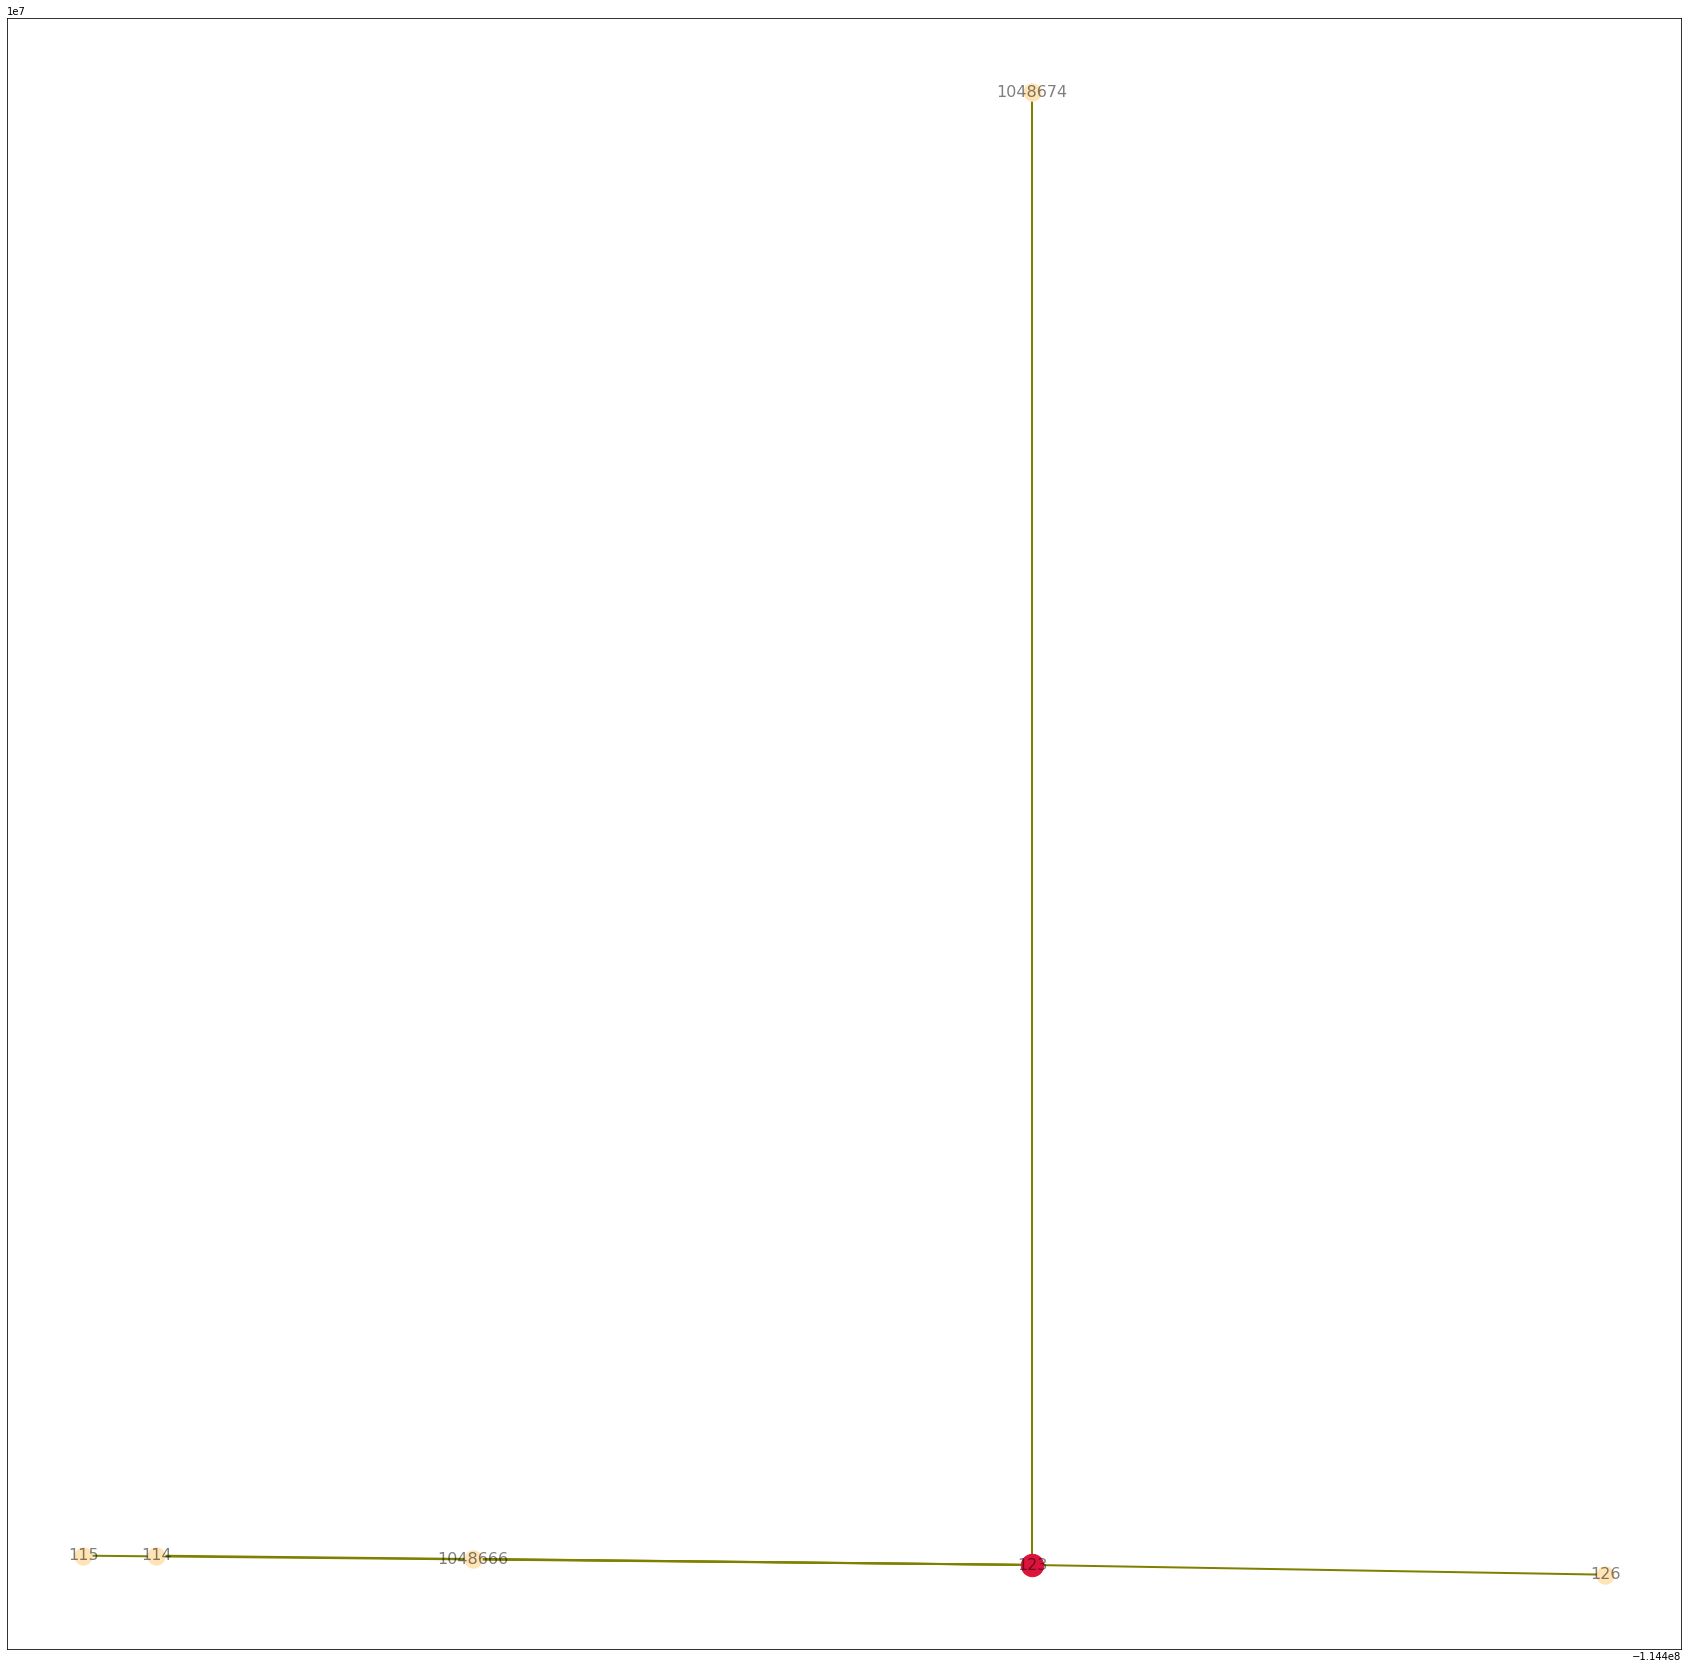

In [5]:
how_does_it_work()

What functionality would you like to run? 2
Write the nodes, each one spaced from the other.  13 34 48 1048668
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 2


C:\Users\HP\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 432x288 with 0 Axes>

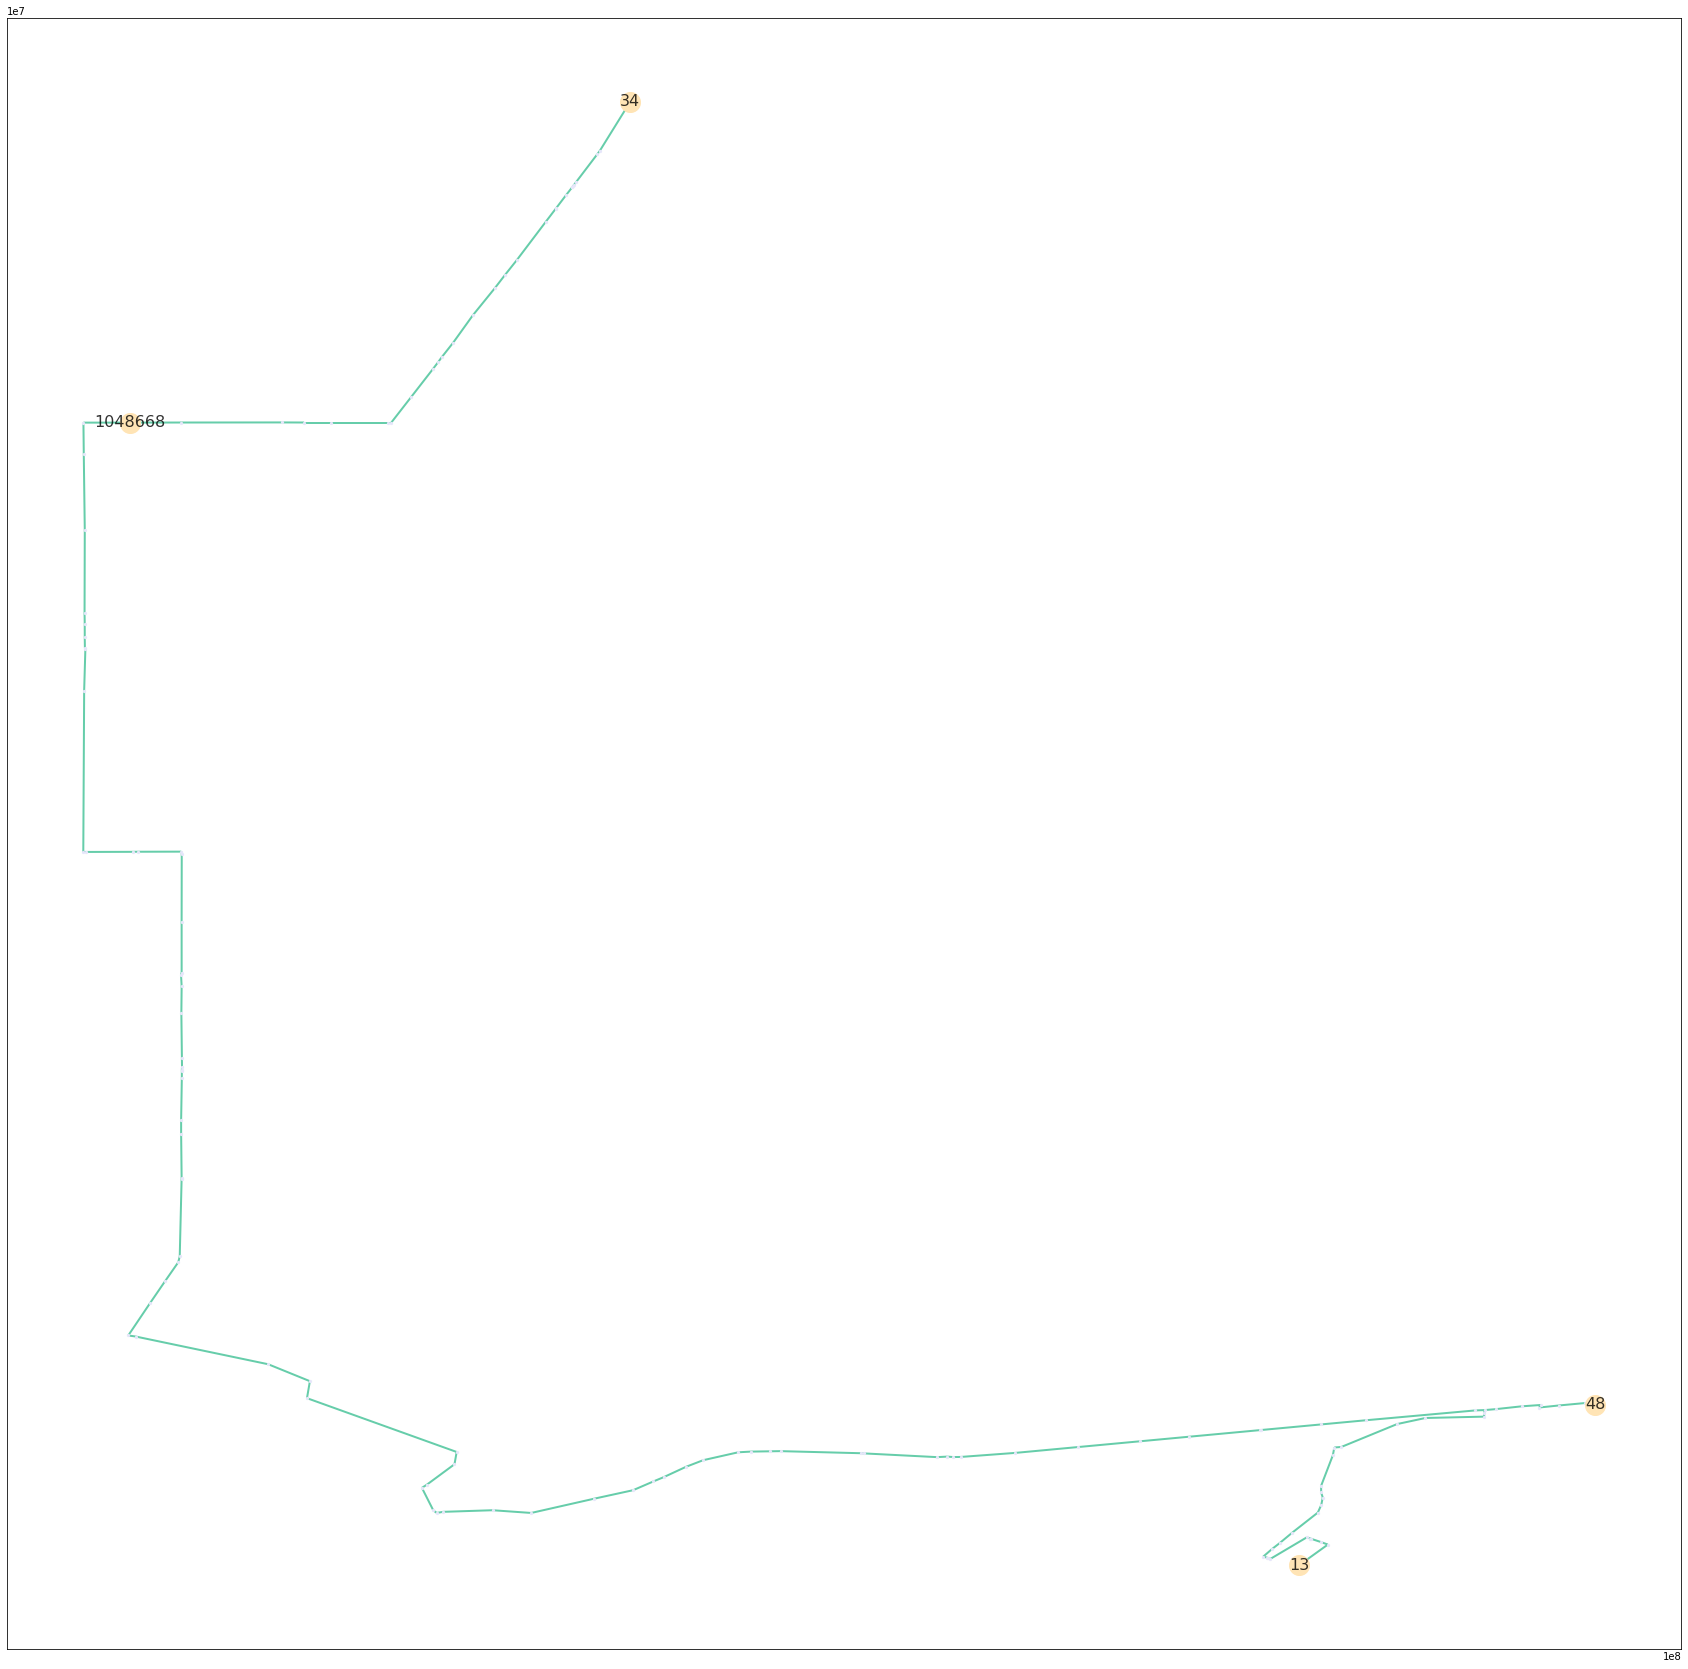

In [6]:
how_does_it_work()

What functionality would you like to run? 3
Write the number associated to the starting node.  
23
Write the nodes, each one spaced from the other.  
25 27 2319 1048661
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 3


C:\Users\HP\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 432x288 with 0 Axes>

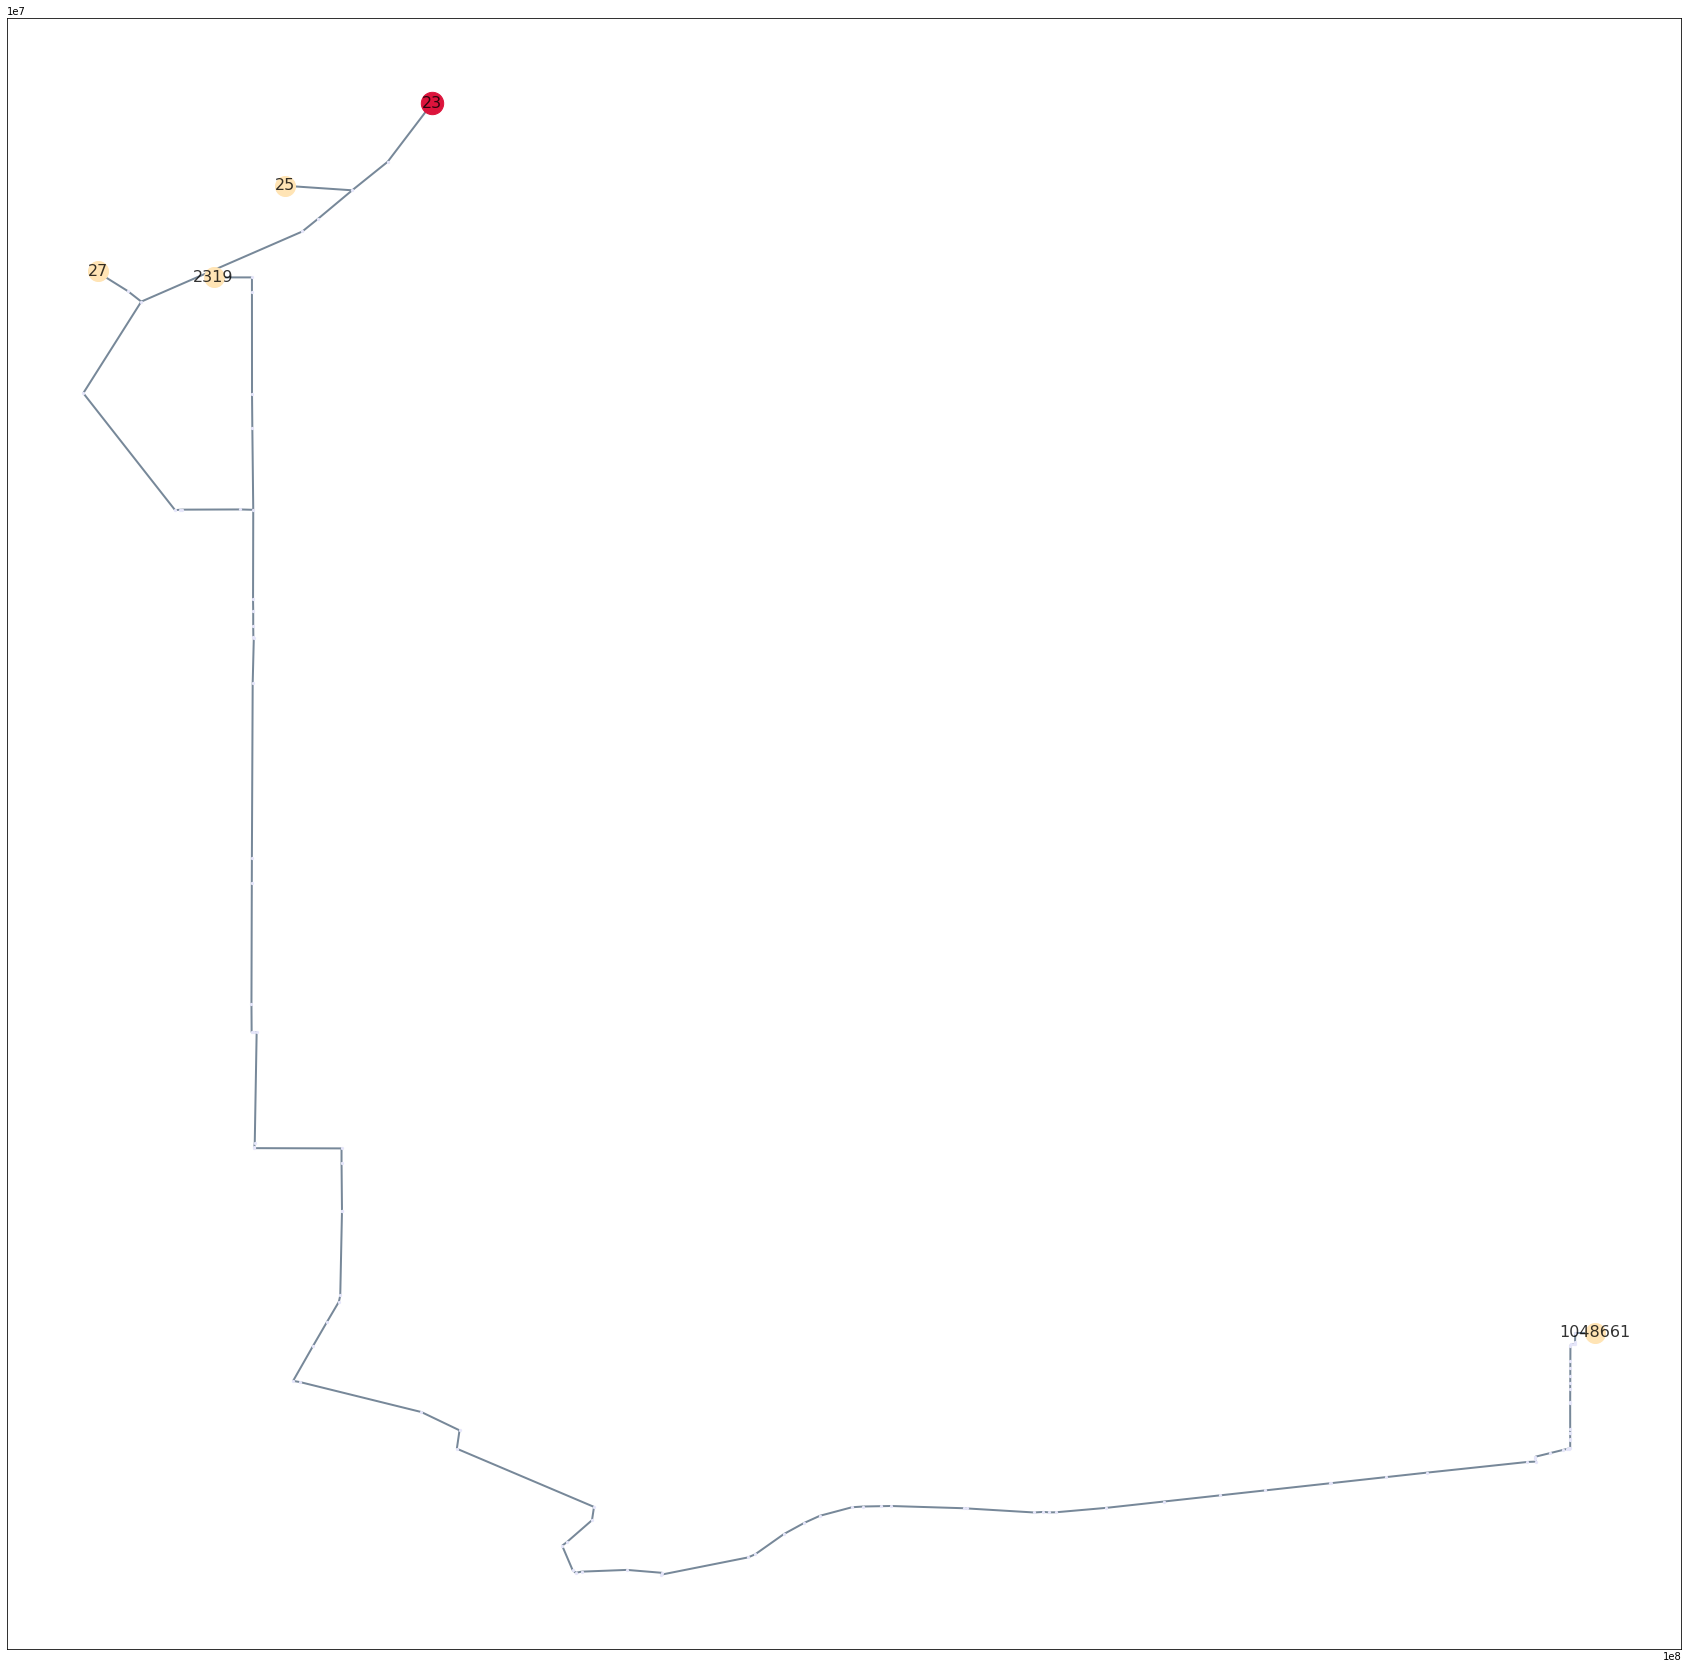

In [8]:
how_does_it_work()

What functionality would you like to run? 4
Write the number associated to the starting node.  
1
Write the nodes, each one spaced from the other, remember the last one will be always our end point.  
78 1050881 34
We need a function to calculate the distance. 1 is for the actual distance, 2 is for the time distance and 3 for the network distance.  
 1


<Figure size 432x288 with 0 Axes>

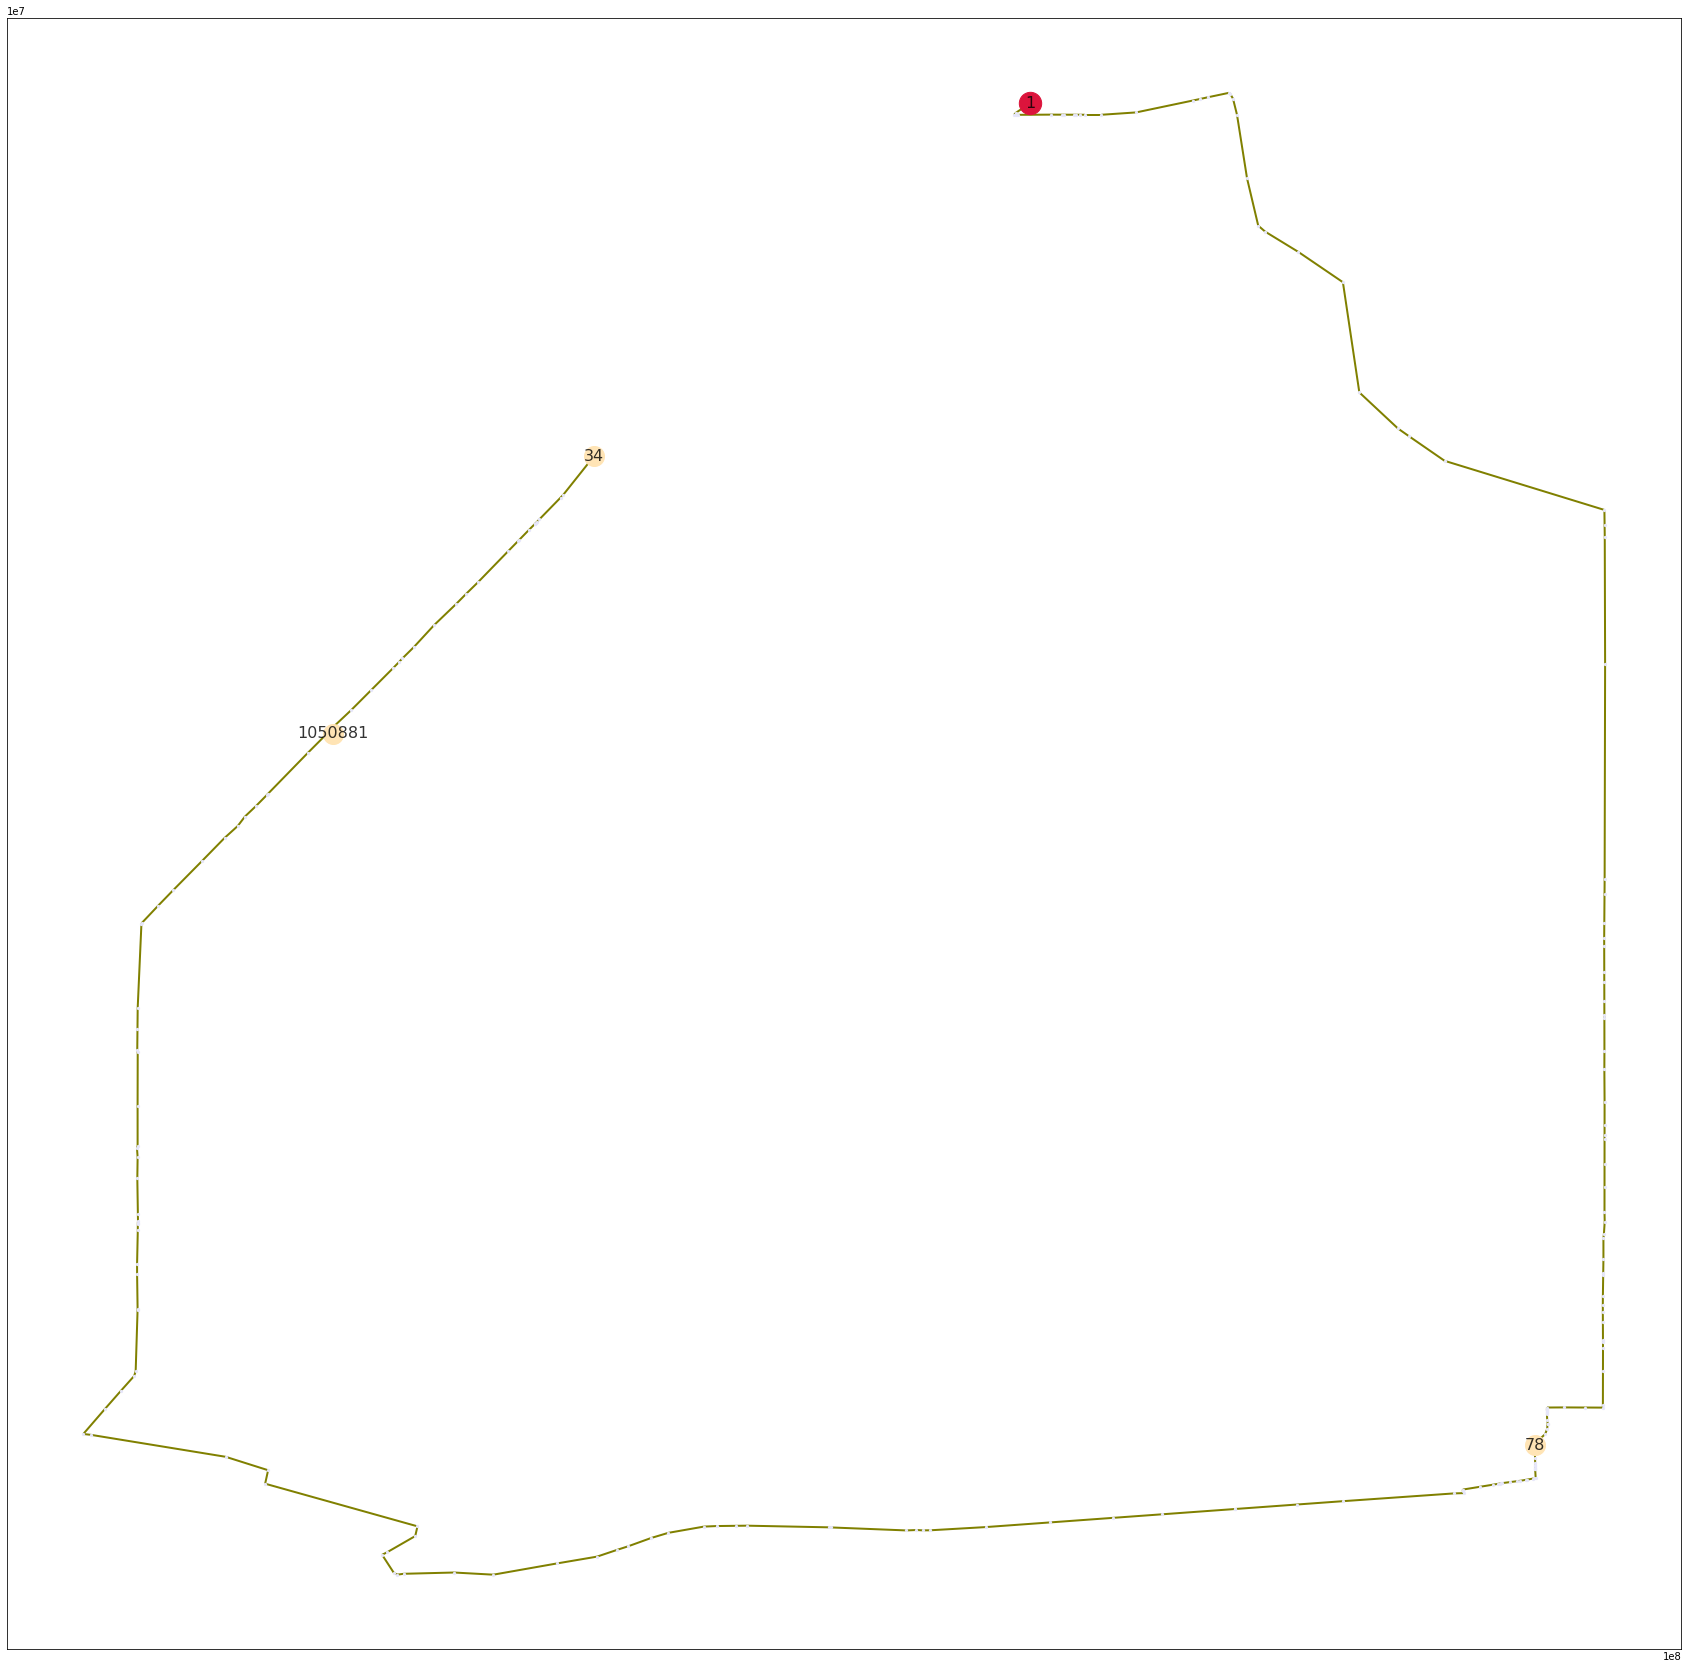

In [12]:
how_does_it_work()